<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Соотношение между КолПассажиров и ВремяМин:
               КолПассажиров  ВремяМин
КолПассажиров       1.000000  0.852971
ВремяМин            0.852971  1.000000
Данные годные.
Линейная регрессия - Тест MSE: 4.58, R²: 0.71
Ридж регрессия - Тест MSE: 4.58, R²: 0.71


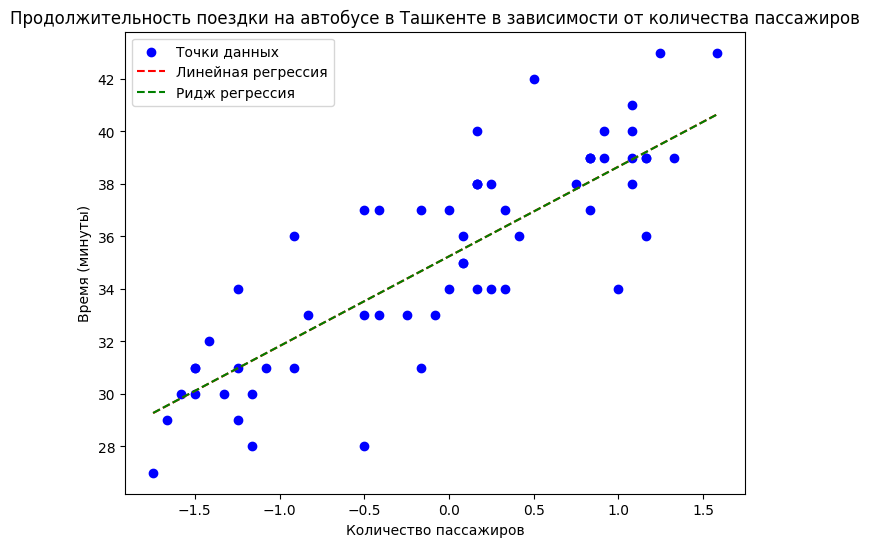

Линейная регрессия - Веса: Перехват=35.24, Коэффициент=3.42
Ридж регрессия - Веса: Перехват=35.24, Коэффициент=3.42


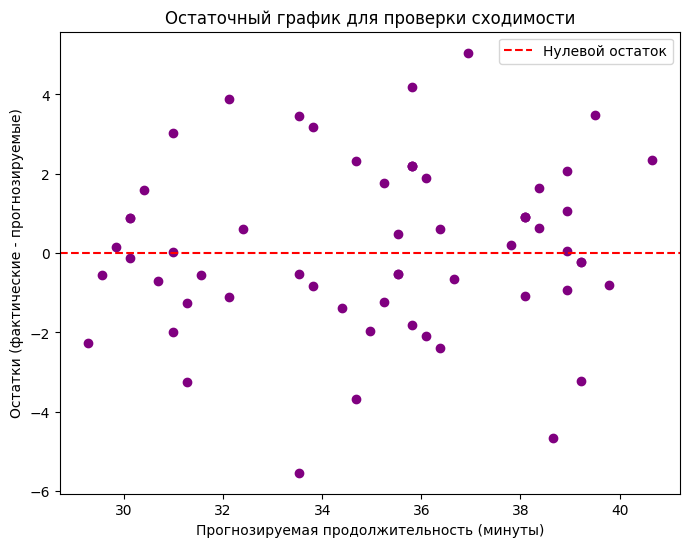

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import files
import matplotlib.pyplot as plt

# Генерирует данные для проекта
np.random.seed(42)
n_rows = 200  # В этом примере я взял 200 образцов
data = {
    'TripID': range(1, n_rows + 1),
    'Рут': np.random.choice(['A', 'B', 'C'], n_rows),
    'КолПассажиров': np.random.randint(30, 71, n_rows),
    'Дата': pd.date_range('2025-01-01', periods=n_rows, freq='D').strftime('%Y-%m-%d'),
    'ВремяДня': np.random.choice(['Утро', 'День', 'Вечер'], n_rows)
}
df = pd.DataFrame(data)
# Смешивает результаты для более реалистичного сценария.
df['ВремяМин'] = 20 + (df['КолПассажиров'] * 0.3) + np.random.normal(0, 2, n_rows)
df['ВремяМин'] = df['ВремяМин'].round().clip(lower=10, upper=50)
df['Стоимость'] = df['ВремяМин'] * 25 + np.random.normal(50, 20, n_rows)
df['Стоимость'] = df['Стоимость'].round().astype(int)
df.to_csv('TashkentTaxi.csv')
files.download('TashkentTaxi.csv')

# Настройка фич и проверка соотношений
df['ВремяДня_Encoded'] = df['ВремяДня'].map({'Утро': 0, 'День': 1, 'Вечер': 2})
print("Соотношение между КолПассажиров и ВремяМин:")
print(df[['КолПассажиров', 'ВремяМин']].corr())

features = ['КолПассажиров']
X = df[features]
y = df['ВремяМин']

# Уравнивает фичи и проверка на NaN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    print("Предупреждение: в данных обнаружены значения NaN или Inf. Проверьте.")
else:
    print("Данные годные.")

# Тренирует и делит данные
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Стандартная линейная регрессия
model = LinearRegression()
model.fit(X_train, y_train)

# Ридж регрессия для стабильности
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Прогноз и оценка
y_test_pred = model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
ridge_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_r2 = r2_score(y_test, y_test_pred_ridge)

print(f"Линейная регрессия - Тест MSE: {test_mse:.2f}, R²: {test_r2:.2f}")
print(f"Ридж регрессия - Тест MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}")

# Визуализация
sorted_indices = np.argsort(X_test[:, 0])
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Точки данных')
plt.plot(X_test[sorted_indices, 0], y_test_pred[sorted_indices], color='red', label='Линейная регрессия', linestyle='--')
plt.plot(X_test[sorted_indices, 0], y_test_pred_ridge[sorted_indices], color='green', label='Ридж регрессия', linestyle='--')
plt.xlabel('Количество пассажиров')
plt.ylabel('Время (минуты)')
plt.title('Продолжительность поездки на автобусе в Ташкенте в зависимости от количества пассажиров')
plt.legend()
plt.show()

# Веса и проверка остатков
print(f"Линейная регрессия - Веса: Перехват={model.intercept_:.2f}, Коэффициент={model.coef_[0]:.2f}")
print(f"Ридж регрессия - Веса: Перехват={ridge_model.intercept_:.2f}, Коэффициент={ridge_model.coef_[0]:.2f}")

residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Нулевой остаток')
plt.xlabel('Прогнозируемая продолжительность (минуты)')
plt.ylabel('Остатки (фактические - прогнозируемые)')
plt.title('Остаточный график для проверки сходимости')
plt.legend()
plt.show()